<a href="https://colab.research.google.com/github/FahadImdad/FahadImdad/blob/main/Brain_Tumor_Classification_Fahad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [138]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [139]:
# Load the dataset
file_path = "/content/Brain Tumor.csv"
data = pd.read_csv(file_path)


# Separate Features and Target Variable

In [140]:
# Separate features (X) and target variable (y)
X = data.drop(['Image', 'Class'], axis=1)
y = data['Class']


# Define Proportion for Training and Testing Sets

In [141]:
# Define the proportion for training and testing sets
train_ratio = 0.8
test_ratio = 1 - train_ratio


# Calculate Number of Samples for Training and Testing Sets

In [142]:
# Calculate the number of samples for training and testing sets
num_samples = len(data)
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train



# Set Random Seed for Reproducibility

In [143]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate Random Indices for the Training Set

In [144]:
# Generate random indices for the training set
train_indices = np.random.choice(num_samples, size=num_train, replace=False)

# Create a Boolean Mask for the Testing Set

In [145]:
# Create a boolean mask for the testing set
test_mask = np.ones(num_samples, dtype=bool)
test_mask[train_indices] = False

# Split the Data into Training and Testing Sets

In [146]:
# Split the data into training and testing sets
X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
X_test, y_test = X[test_mask], y[test_mask]

# Reset Indices

In [147]:
# # Reset indices to ensure they match
# X_train_reset = X_train.reset_index(drop=True)
# y_train_reset = y_train.reset_index(drop=True)




---



# Preprocessing Steps


---



---



Explanation: In this section, we perform preprocessing steps on the dataset.

We standardize the features by scaling them to have mean=0 and variance=1.

Additionally, missing values are handled by replacing NaN with the mean of the respective columns.

In [148]:
# Standardization (scaling features to have mean=0 and variance=1)
mean_values = X_train.mean()
std_dev_values = X_train.std()

In [149]:
X_train_scaled = (X_train - mean_values) / std_dev_values
X_test_scaled = (X_test - mean_values) / std_dev_values


In [150]:
# Handling missing values (replace NaN with mean)
X_train_scaled = X_train_scaled.fillna(X_train_scaled.mean())
X_test_scaled = X_test_scaled.fillna(X_test_scaled.mean())

In [151]:
# Standardization (scaling features to have mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
# Handling missing values (replace NaN with mean)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns).fillna(X_train_scaled.mean())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns).fillna(X_test_scaled.mean())


## Display Information about Preprocessed Data


Explanation: We print the shape of the preprocessed training and testing sets along with the shape of the target variables.

In [153]:
# Display information about the preprocessed data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (3009, 13)
X_test_scaled shape: (753, 13)
y_train shape: (3009,)
y_test shape: (753,)


# Scatter Plots Before and After Preprocessing

In [154]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

In [155]:
# # Plotting each feature for tumor and non-tumor classes before preprocessing
# for feature in X_train_scaled.columns:
#     # Create a figure with two subplots (side by side)
#     plt.figure(figsize=(12, 5))

#     # Before preprocessing
#     plt.subplot(1, 2, 1)
#     plt.scatter(
#         X_train.loc[y_train == 1, feature], y_train[y_train == 1],
#         label='Tumor', alpha=0.8
#     )
#     plt.scatter(
#         X_train.loc[y_train == 0, feature], y_train[y_train == 0],
#         label='Non-Tumor', alpha=0.8
#     )
#     plt.title(f'{feature} - Before Preprocessing')
#     plt.xlabel(feature)
#     plt.ylabel('Class')
#     plt.legend()

#     # After preprocessing
#     plt.subplot(1, 2, 2)
#     plt.scatter(
#         X_train_scaled.reset_index(drop=True).loc[y_train == 1, feature], y_train[y_train == 1],
#         label='Tumor', alpha=0.8
#     )
#     plt.scatter(
#         X_train_scaled.reset_index(drop=True).loc[y_train == 0, feature], y_train[y_train == 0],
#         label='Non-Tumor', alpha=0.8
#     )
#     plt.title(f'{feature} - After Preprocessing')
#     plt.xlabel(f'{feature} (Scaled)')
#     plt.ylabel('Class')
#     plt.legend()

#     # Adjust layout for better spacing
#     plt.tight_layout()

#     # Display the plots
#     plt.show()


# Concatenate Data for Pair Plot Visualization
---



In [156]:
# Concatenate X_train and y_train for pair plot visualization
train_data_before = pd.concat([X_train, y_train], axis=1)
train_data_after = pd.concat([pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train], axis=1)


# Pair Plot Before Preprocessing

Text(0.5, 1.0, 'Pair Plot - Before Preprocessing')

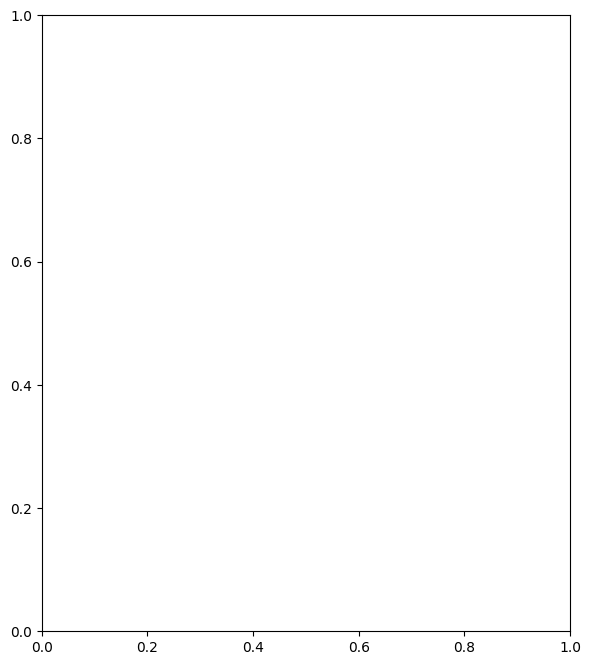

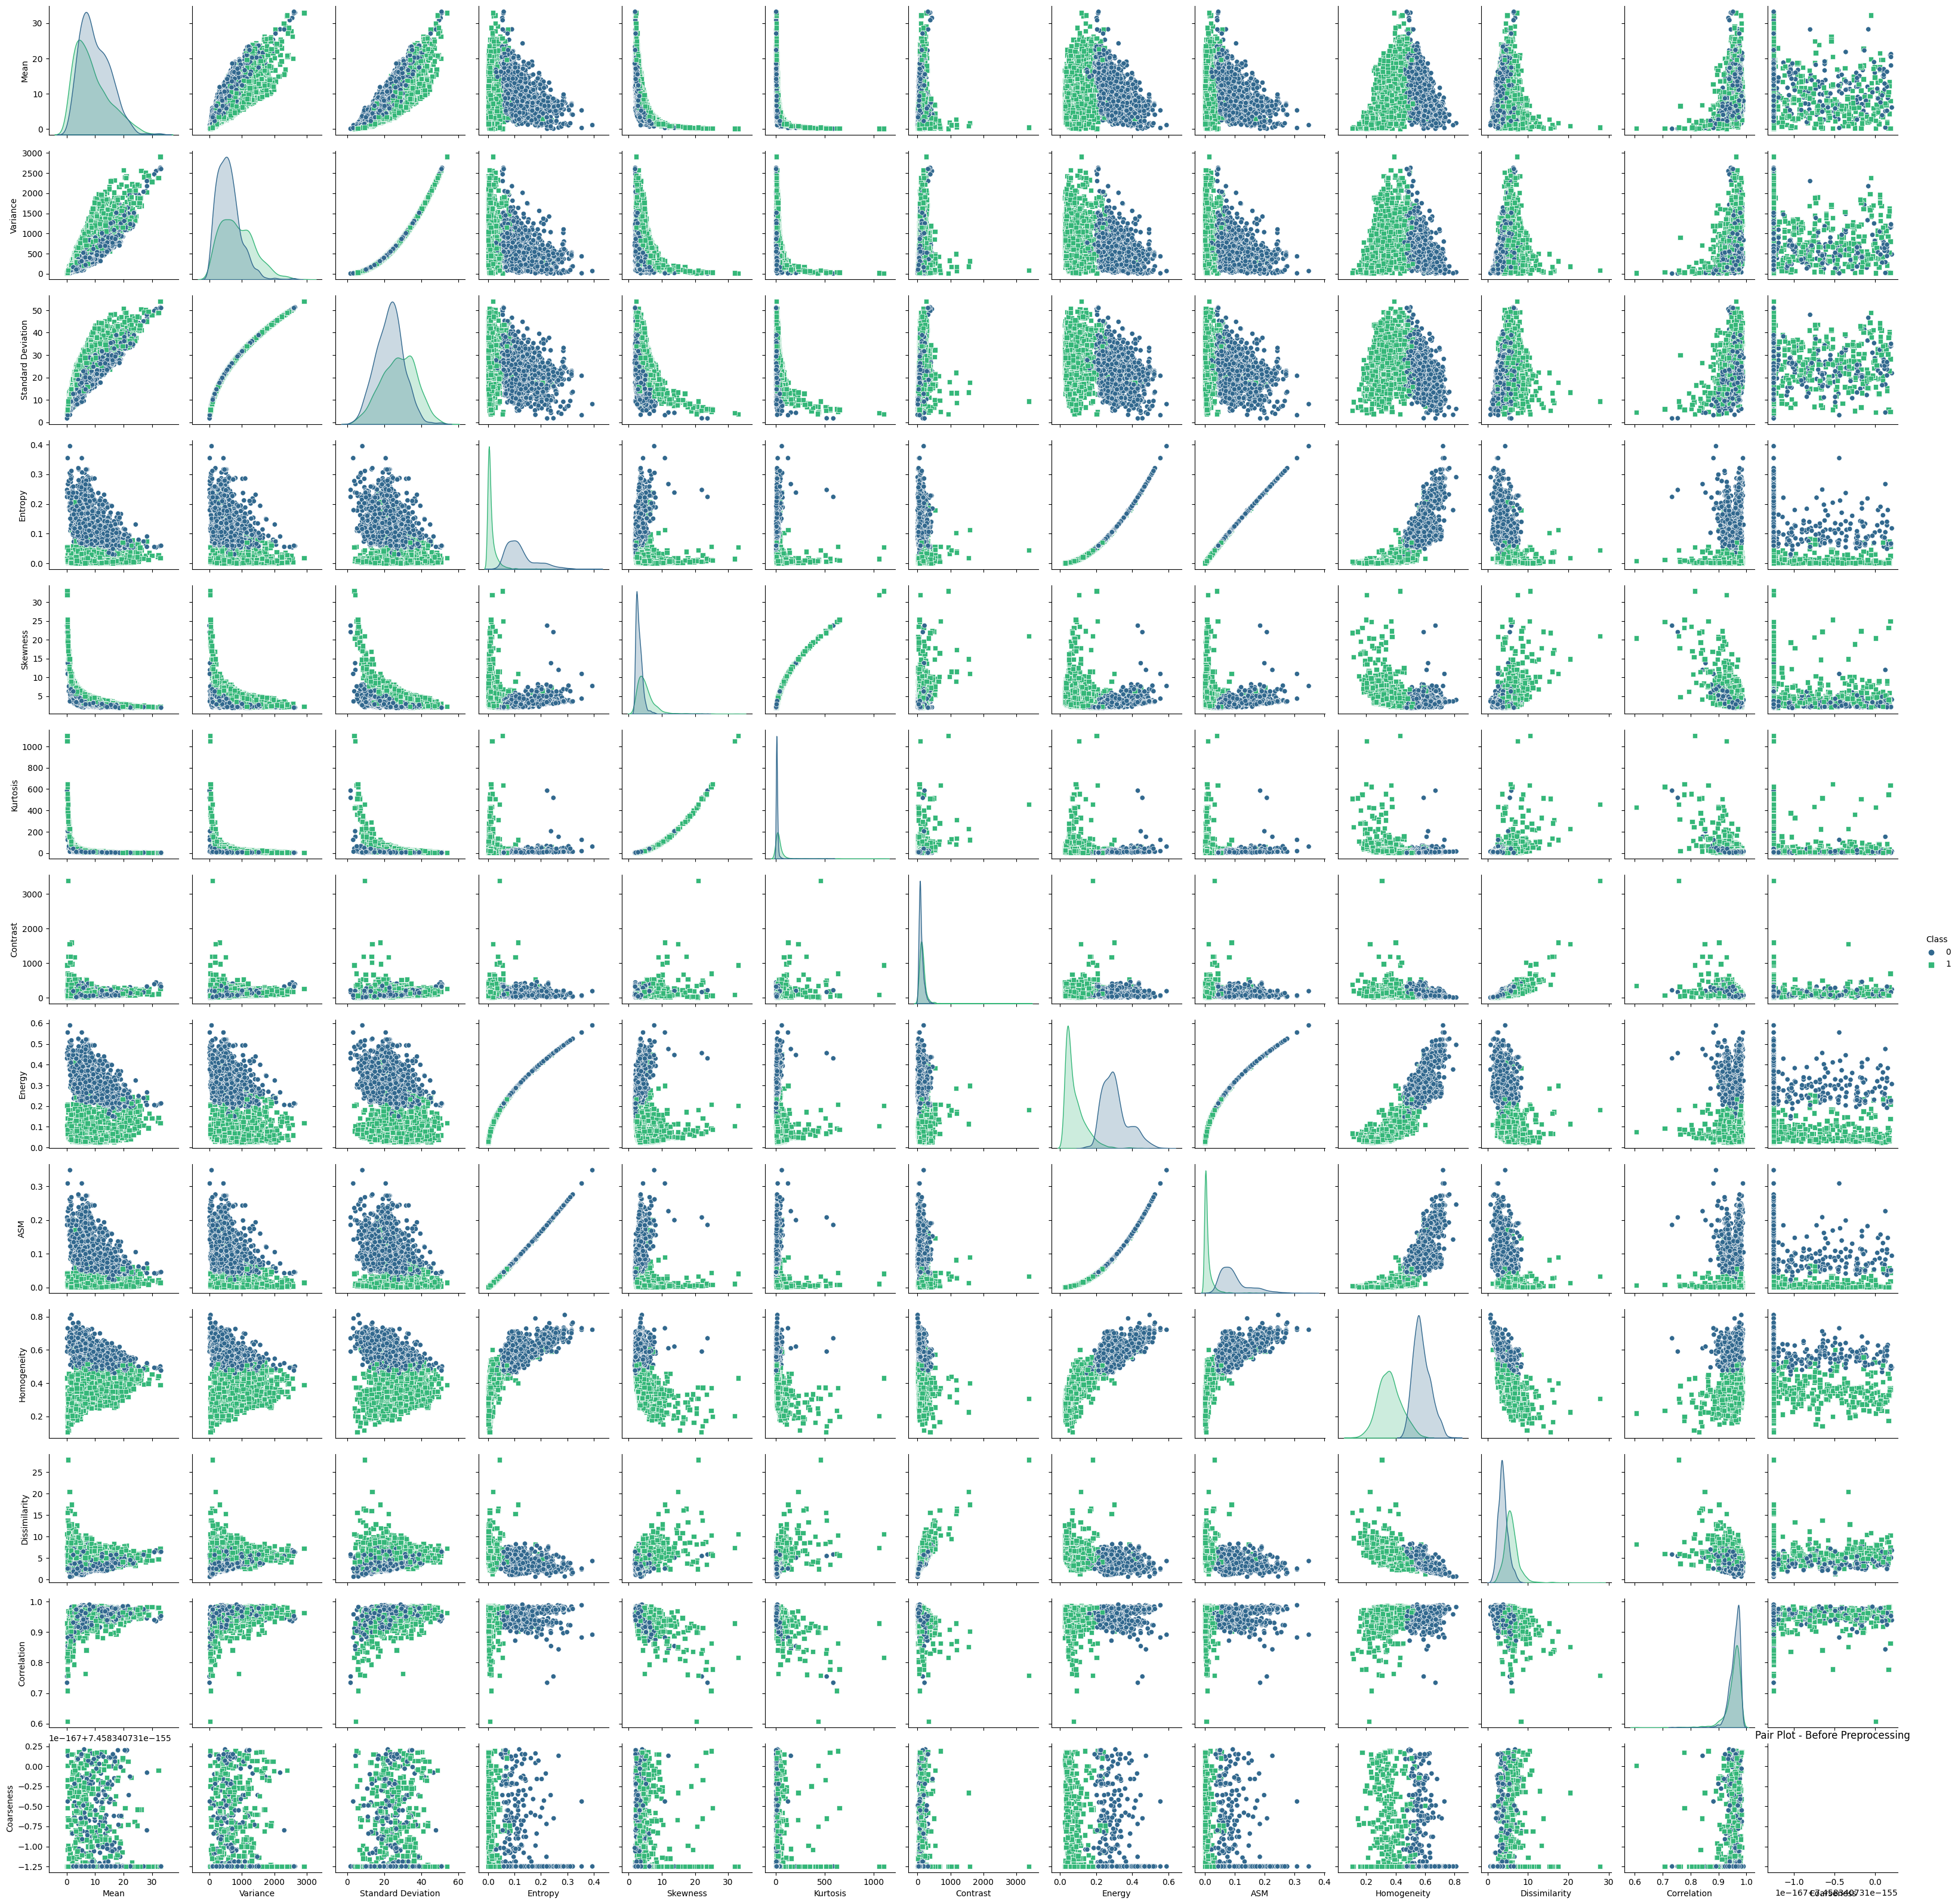

In [157]:
# Pair plot before preprocessing
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.pairplot(train_data_before, hue='Class', markers=['o', 's'], palette='viridis')
plt.title('Pair Plot - Before Preprocessing')


# Pair Plot After Preprocessing

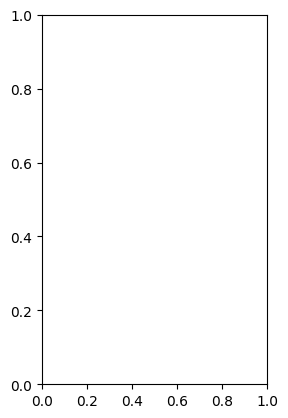

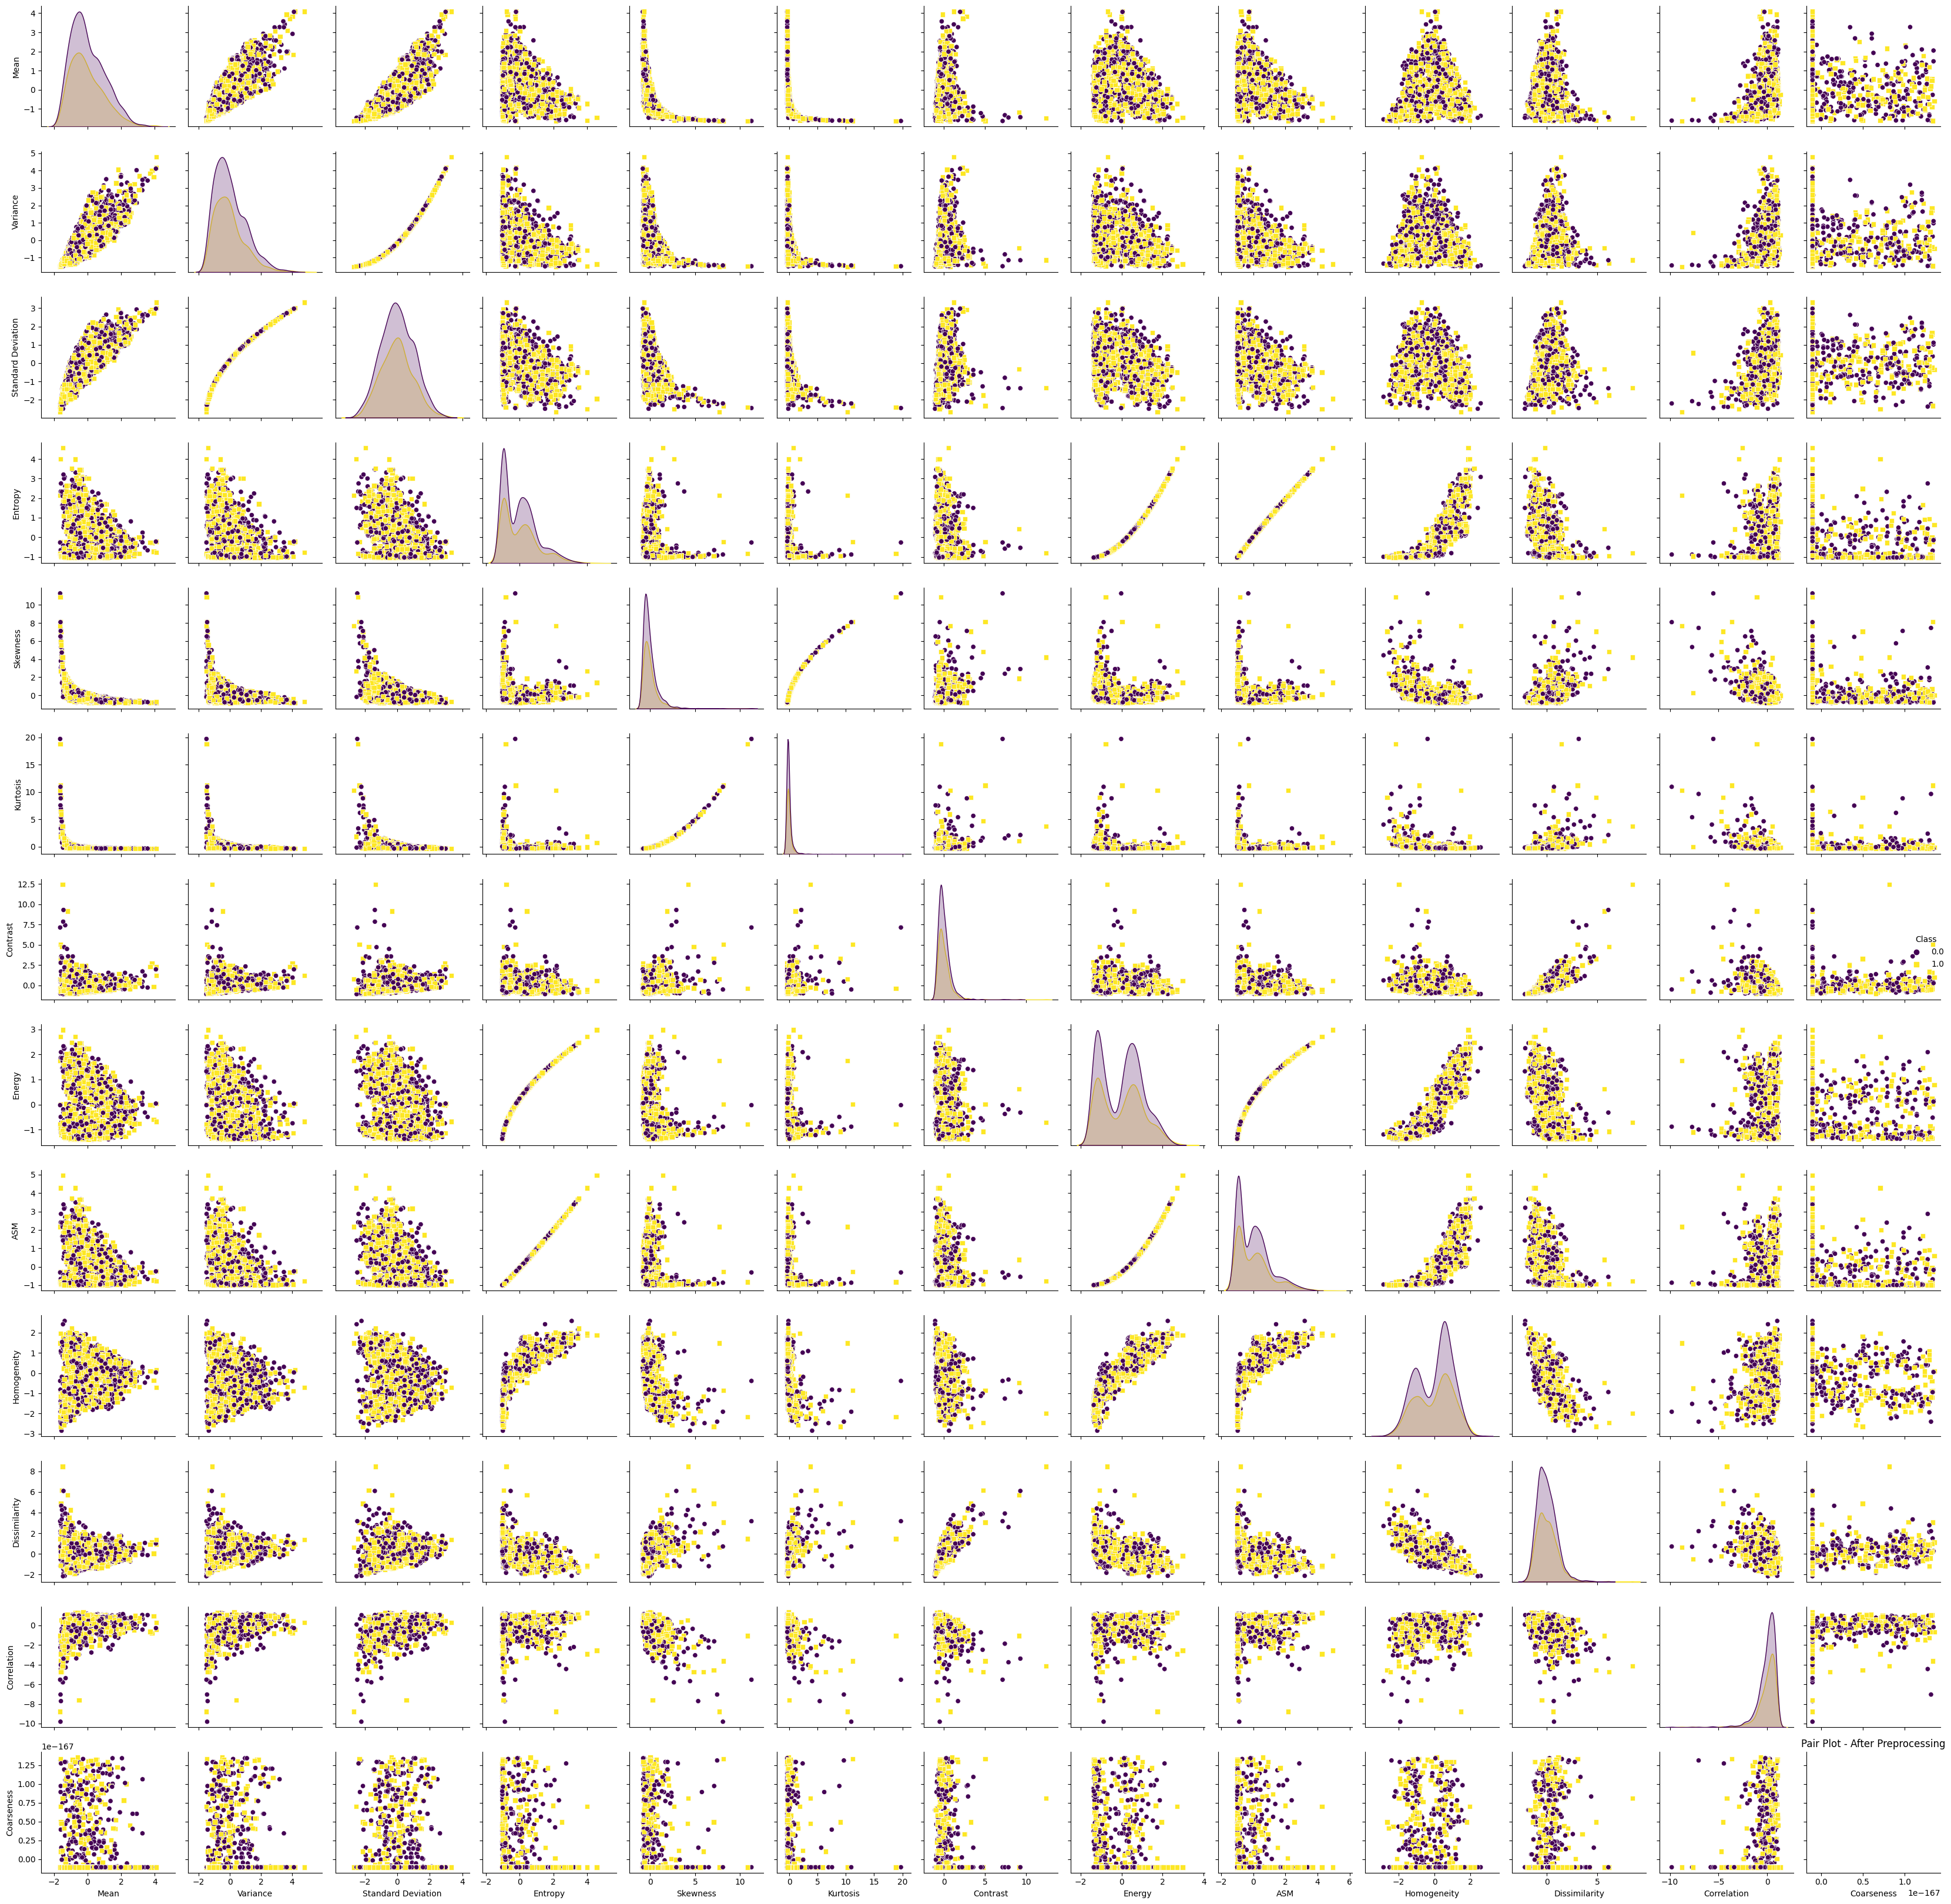

In [158]:
# Pair plot after preprocessing
plt.subplot(1, 2, 2)
sns.pairplot(train_data_after, hue='Class', markers=['o', 's'], palette='viridis')
plt.title('Pair Plot - After Preprocessing')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

# Create a Boolean Mask for the Testing Set

In [159]:
# Create a boolean mask for the testing set
test_mask = np.ones(num_samples, dtype=bool)
test_mask[train_indices] = False

# Split the Data into Training and Testing Sets

In [160]:
# Split the data into training and testing sets
X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
X_test, y_test = X[test_mask], y[test_mask]

# Reset Indices

In [161]:
# Reset indices to ensure they match
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)




---



# Decision Tree

---



---



# Import Libraries

In [162]:
import numpy as np
from math import log2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Decision Tree Implementation

In [163]:
import numpy as np
from math import log2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        unique_classes = list(set(y))

        # If only one class is present or max depth is reached, create a leaf node
        if len(unique_classes) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'class': unique_classes[0], 'is_leaf': True}

        # Find the best split
        best_split = self._find_best_split(X, y)

        if best_split is None:
            # Unable to find a split, create a leaf node
            return {'class': unique_classes[0], 'is_leaf': True}

        # Split the dataset
        left_indices = X[best_split['feature']] <= best_split['threshold']
        right_indices = ~left_indices

        # Build the subtrees
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree,
            'is_leaf': False
        }

    def _find_best_split(self, X, y):
        # Dummy implementation: finds the split that maximizes the information gain
        best_split = None
        best_gain = 0.0

        for feature in X.columns:
            thresholds = set(X[feature])
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices

                if sum(left_indices) == 0 or sum(right_indices) == 0:
                    continue

                gain = self._information_gain(y, y[left_indices], y[right_indices])

                if gain > best_gain:
                    best_gain = gain
                    best_split = {'feature': feature, 'threshold': threshold, 'gain': gain}

        return best_split

    def _information_gain(self, parent, left_child, right_child):
        # Dummy implementation: calculates information gain
        return 0.0  # Replace with your implementation

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self._predict_single(row, self.tree))
        return predictions

    def _predict_single(self, instance, node):
        if node['is_leaf']:
            return node['class']

        if instance[node['feature']] <= node['threshold']:
            return self._predict_single(instance, node['left'])
        else:
            return self._predict_single(instance, node['right'])

    def _information_gain(self, parent, left_child, right_child):
        entropy_parent = self._calculate_entropy(parent)
        entropy_left = self._calculate_entropy(left_child)
        entropy_right = self._calculate_entropy(right_child)

        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)

        information_gain = entropy_parent - (weight_left * entropy_left + weight_right * entropy_right)
        return information_gain

    def _calculate_entropy(self, data):
        classes, counts = np.unique(data, return_counts=True)
        probabilities = counts / len(data)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small epsilon to avoid log(0)
        return entropy

# Create Decision Tree Instance

In [164]:
# Create an instance of the DecisionTree class
tree_classifier = DecisionTree(max_depth=5)  # You can adjust the max_depth parameter


# Reset Indices of Training Data

In [165]:
# Reset indices of the training data to ensure they match
X_train_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


# Fit Decision Tree Model

In [166]:
# Fit the model on the training set
tree_classifier.fit(X_train_scaled, y_train)


----
#        **GUI**

---



---

In [167]:
# Import necessary libraries
import pandas as pd
import ipywidgets as widgets
from IPython.display import display,HTML



# Create the heading widget
heading_widget = HTML("<h1 style='text-align:left; color: blue;'>Brain Tumor Classification</h1><br>")



# Function to make predictions
def make_predictions(b):
    # Get values from the input widgets
    input_values = {
        'Mean': [float(mean_text.value)],
        'Variance': [float(variance_text.value)],
        'Standard Deviation': [float(std_dev_text.value)],
        'Entropy': [float(entropy_text.value)],
        'Skewness': [float(skewness_text.value)],
        'Kurtosis': [float(kurtosis_text.value)],
        'Contrast': [float(contrast_text.value)],
        'Energy': [float(energy_text.value)],
        'ASM': [float(asm_text.value)],
        'Homogeneity': [float(homogeneity_text.value)],
        'Dissimilarity': [float(dissimilarity_text.value)],
        'Correlation': [float(correlation_text.value)],
        'Coarseness': [float(coarseness_text.value)]
    }

    # Create a DataFrame with the input values
    new_data = pd.DataFrame(input_values)

    # Make predictions
    predictions = tree_classifier.predict(new_data)

    # Display the result
    Tumor_label.value = "Brain Tumor detected" if predictions[0] == 1 else "No Brain Tumor was Detected"

# Create text fields for input values
mean_text = widgets.Text(description='Mean')
variance_text = widgets.Text(description='Variance')
std_dev_text = widgets.Text(description='Std Dev')
entropy_text = widgets.Text(description='Entropy')
skewness_text = widgets.Text(description='Skewness')
kurtosis_text = widgets.Text(description='Kurtosis')
contrast_text = widgets.Text(description='Contrast')
energy_text = widgets.Text(description='Energy')
asm_text = widgets.Text(description='ASM')
homogeneity_text = widgets.Text(description='Homogeneity')
dissimilarity_text = widgets.Text(description='Dissimilarity')
correlation_text = widgets.Text(description='Correlation')
coarseness_text = widgets.Text(description='Coarseness')


# Create a button to trigger predictions
predict_button = widgets.Button(description='Predict', style={'button_color': 'green'}, layout=widgets.Layout(width='auto'))
predict_button.on_click(make_predictions)

# Create a label to display the result
result_label = widgets.Label(value='Result:')

Tumor_label = widgets.Label(value='', layout=widgets.Layout(width='200px', height='50px'))



# Create a button to automatically switch to the next values in the test dataset
auto_switch_button = widgets.Button(description='Auto Test Dataset Switch', style={'button_color': 'blue'}, layout=widgets.Layout(width='auto'))

def auto_switch_dataset(b):
    global X_test_scaled, y_test

    # Check if there are more rows in the test dataset
    if not X_test_scaled.empty and not y_test.empty:
        # Move to the next row in X_test_scaled
        current_row = X_test_scaled.iloc[0]
        X_test_scaled = X_test_scaled.iloc[1:]

        # Move to the next label in y_test
        current_label = y_test.iloc[0]
        y_test = y_test.iloc[1:]

        # Update the values in the text fields
        mean_text.value = str(current_row['Mean'])
        variance_text.value = str(current_row['Variance'])
        std_dev_text.value = str(current_row['Standard Deviation'])
        entropy_text.value = str(current_row['Entropy'])
        skewness_text.value = str(current_row['Skewness'])
        kurtosis_text.value = str(current_row['Kurtosis'])
        contrast_text.value = str(current_row['Contrast'])
        energy_text.value = str(current_row['Energy'])
        asm_text.value = str(current_row['ASM'])
        homogeneity_text.value = str(current_row['Homogeneity'])
        dissimilarity_text.value = str(current_row['Dissimilarity'])
        correlation_text.value = str(current_row['Correlation'])
        coarseness_text.value = str(current_row['Coarseness'])

        # Display a message indicating the current dataset
        dataset_label.value = f"Current Dataset: Auto-Switched"

# Attach the auto_switch_dataset function to the button
auto_switch_button.on_click(auto_switch_dataset)

# Create a label to display the current dataset
dataset_label = widgets.Label(value=f"Current Dataset: Initial")

In [168]:
from sklearn.metrics import classification_report, accuracy_score

# Create a button to generate a Classification Report
classification_report_button = widgets.Button(description='Decision Tree Classification Report', style={'button_color': 'brown'}, layout=widgets.Layout(width='auto'))

# Create a button to predict test accuracy
accuracy_button = widgets.Button(description='Predic Decision Tree Test Accuracy', style={'button_color': 'purple'}, layout=widgets.Layout(width='auto'))

# Function to generate and display the Classification Report
def generate_classification_report(b):
    # Assuming you have X_test_scaled and y_test loaded
    y_pred = tree_classifier.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor'])
    display(HTML(f"<pre>{report}</pre>"))

# Function to predict and display test accuracy
def predict_test_accuracy(b):
    # Assuming you have X_test_scaled and y_test loaded
    y_pred = tree_classifier.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_label.value = f"Decision Tree Test Accuracy: {acc:.2%}"

# Attach functions to buttons
classification_report_button.on_click(generate_classification_report)
accuracy_button.on_click(predict_test_accuracy)


# Create a label to display the test accuracy
accuracy_label = widgets.Label(value='Decision Tree Test Accuracy:')

# KNN Classifier



In [169]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

class KNNClassifier:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test, k):
        y_pred = []
        for x in X_test.values:
            try:
                distances = np.linalg.norm(self.X_train - x, axis=1)
                nearest_neighbors = np.argsort(distances)[:k]
                nearest_labels = self.y_train.iloc[nearest_neighbors]
                pred_label = np.bincount(nearest_labels).argmax()
                y_pred.append(pred_label)
            except Exception as e:
                print(f"Error in prediction: {e}")
                y_pred.append(np.nan)
        return np.array(y_pred)

# X_train_scaled, X_test_scaled, y_train, y_test loaded

# Create KNN classifier
knn_classifier = KNNClassifier(X_train_scaled, y_train)

# Create a button to generate a Classification Report for KNN
knn_classification_report_button = widgets.Button(description='KNN Classification Report', style={'button_color': 'brown'}, layout=widgets.Layout(width='auto'))

# Create a button to predict KNN test accuracy
knn_accuracy_button = widgets.Button(description='Predict KNN Test Accuracy', style={'button_color': 'purple'}, layout=widgets.Layout(width='auto'))

def generate_knn_classification_report(b):
    try:
        y_pred_knn = knn_classifier.predict(X_test_scaled, k=5)  # Use your desired k value
        report_knn = classification_report(y_test, y_pred_knn, target_names=['No Tumor', 'Tumor'], zero_division=1)
        display(HTML(f"<pre>{report_knn}</pre>"))
    except Exception as e:
        print(f"Error in generating KNN classification report: {e}")

# Attach functions to buttons for KNN
knn_classification_report_button.on_click(generate_knn_classification_report)

# Function to predict and display KNN test accuracy
def predict_knn_test_accuracy(b):
    try:
        y_pred_knn = knn_classifier.predict(X_test_scaled, k=5)  # Use your desired k value
        acc_knn = accuracy_score(y_test, y_pred_knn)
        knn_accuracy_label.value = f"KNN Test Accuracy: {acc_knn:.2%}"
    except Exception as e:
        print(f"Error in predicting KNN test accuracy: {e}")

# Attach functions to buttons for KNN
knn_accuracy_button.on_click(predict_knn_test_accuracy)

# Create a label to display the KNN test accuracy
knn_accuracy_label = widgets.Label(value='KNN Test Accuracy:')

# SVM Classifier

In [170]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import ipywidgets as widgets
from IPython.display import display, HTML

# Assuming you have X_train_scaled, y_train, X_test_scaled, y_test loaded

# Create SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose the appropriate kernel

# Fit the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Function to generate and display the SVM Classification Report
def generate_svm_classification_report(b, classifier, X_test_scaled, y_test):
    y_pred_svm = classifier.predict(X_test_scaled)
    report_svm = classification_report(y_test, y_pred_svm, target_names=['No Tumor', 'Tumor'], zero_division=1)
    display(HTML(f"<pre>{report_svm}</pre>"))

# Function to predict and display SVM test accuracy
def predict_svm_test_accuracy(b, classifier, X_test_scaled, y_test):
    y_pred_svm = classifier.predict(X_test_scaled)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    svm_accuracy_label.value = f"SVM Test Accuracy: {acc_svm:.2%}"

# Attach functions to buttons for SVM
svm_classification_report_button = widgets.Button(
    description='SVM Classification Report',
    style={'button_color': 'brown'},
    layout=widgets.Layout(width='auto')
)
svm_accuracy_button = widgets.Button(
    description='Predict SVM Test Accuracy',
    style={'button_color': 'purple'},
    layout=widgets.Layout(width='auto')
)

svm_classification_report_button.on_click(lambda b: generate_svm_classification_report(b, svm_classifier, X_test_scaled, y_test))
svm_accuracy_button.on_click(lambda b: predict_svm_test_accuracy(b, svm_classifier, X_test_scaled, y_test))

# Create a label to display the SVM test accuracy
svm_accuracy_label = widgets.Label(value='SVM Test Accuracy:')

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# already have KNNClassifier, X_test_scaled, y_test

# Function to generate and display the KNN Confusion Matrix
def generate_knn_confusion_matrix(b):
    knn_y_pred = knn_classifier.predict(X_test_scaled, k=5)  # Use your desired k value
    cm = confusion_matrix(y_test, knn_y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
    plt.title("KNN Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Create a button to generate KNN Confusion Matrix
knn_confusion_matrix_button = widgets.Button(description='KNN Confusion Matrix', style={'button_color': 'navy'}, layout=widgets.Layout(width='auto'))

# Attach function to the button
knn_confusion_matrix_button.on_click(generate_knn_confusion_matrix)


def generate_tree_confusion_matrix(b):
    tree_y_pred = tree_classifier.predict(X_test_scaled)
    cm = confusion_matrix(y_test, tree_y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
    plt.title("Decision Tree Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Create a button to generate Decision Tree Confusion Matrix
tree_confusion_matrix_button = widgets.Button(description='Decision Tree Confusion Matrix', style={'button_color': 'navy'}, layout=widgets.Layout(width='auto'))

# Attach function to the button
tree_confusion_matrix_button.on_click(generate_tree_confusion_matrix)


# Function to generate and display the SVM Confusion Matrix
def generate_svm_confusion_matrix(b):
    svm_y_pred = svm_classifier.predict(X_test_scaled)
    cm = confusion_matrix(y_test, svm_y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
    plt.title("SVM Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Create a button to generate SVM Confusion Matrix
svm_confusion_matrix_button = widgets.Button(description='SVM Confusion Matrix', style={'button_color': 'navy'}, layout=widgets.Layout(width='auto'))

# Attach function to the button
svm_confusion_matrix_button.on_click(generate_svm_confusion_matrix)

In [172]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming you have features, X_train, and y_train defined
features = ["Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness"]

# Create a decision tree classifier (you can adjust max_depth as needed)
tree_classifier = DecisionTreeClassifier(max_depth=3)

# Fit the classifier
tree_classifier.fit(X_train, y_train)

# Function to visualize the decision tree
def visualize_decision_tree(b):
    plt.figure(figsize=(15, 10))
    plot_tree(tree_classifier, feature_names=features, class_names=['No Tumor', 'Tumor'], filled=True, rounded=True)
    plt.title('Decision Tree Visualization')
    plt.show()

# Create a colorful button to visualize the decision tree
visualize_button = widgets.Button(description='Decision Tree Visualization', style={'button_color': 'lightcoral'}, layout=widgets.Layout(width='auto'))
visualize_button.on_click(visualize_decision_tree)

## Display Widgets

Explanation: The code includes the necessary widgets and buttons for creating an interactive user interface. The widgets include text fields, buttons, and labels. The buttons are linked to specific functions
for making predictions, auto-switching datasets, generating classification reports, predicting accuracies, and displaying confusion matrices. The interface allows users to interact with the machine learning models and visualize their performance.

Text(value='', description='Mean')

Text(value='', description='Variance')

Text(value='', description='Std Dev')

Text(value='', description='Entropy')

Text(value='', description='Skewness')

Text(value='', description='Kurtosis')

Text(value='', description='Contrast')

Text(value='', description='Energy')

Text(value='', description='ASM')

Text(value='', description='Homogeneity')

Text(value='', description='Dissimilarity')

Text(value='', description='Correlation')

Text(value='', description='Coarseness')

Button(description='Predict', layout=Layout(width='auto'), style=ButtonStyle(button_color='green'))

Label(value='Result:')

Label(value='', layout=Layout(height='50px', width='200px'))

Button(description='Auto Test Dataset Switch', layout=Layout(width='auto'), style=ButtonStyle(button_color='bl…

Label(value='Current Dataset: Initial')

Button(description='Predic Decision Tree Test Accuracy', layout=Layout(width='auto'), style=ButtonStyle(button…

Label(value='Decision Tree Test Accuracy:')

Button(description='Predict KNN Test Accuracy', layout=Layout(width='auto'), style=ButtonStyle(button_color='p…

Label(value='KNN Test Accuracy:')

Button(description='Predict SVM Test Accuracy', layout=Layout(width='auto'), style=ButtonStyle(button_color='p…

Label(value='SVM Test Accuracy:')

Button(description='Decision Tree Classification Report', layout=Layout(width='auto'), style=ButtonStyle(butto…

Button(description='KNN Classification Report', layout=Layout(width='auto'), style=ButtonStyle(button_color='b…

Button(description='SVM Classification Report', layout=Layout(width='auto'), style=ButtonStyle(button_color='b…

Button(description='Decision Tree Confusion Matrix', layout=Layout(width='auto'), style=ButtonStyle(button_col…

Button(description='KNN Confusion Matrix', layout=Layout(width='auto'), style=ButtonStyle(button_color='navy')…

Button(description='SVM Confusion Matrix', layout=Layout(width='auto'), style=ButtonStyle(button_color='navy')…

Button(description='Decision Tree Visualization', layout=Layout(width='auto'), style=ButtonStyle(button_color=…

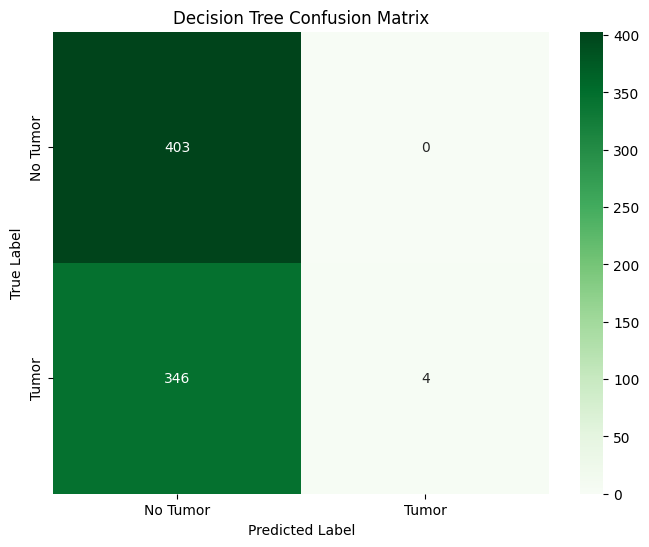

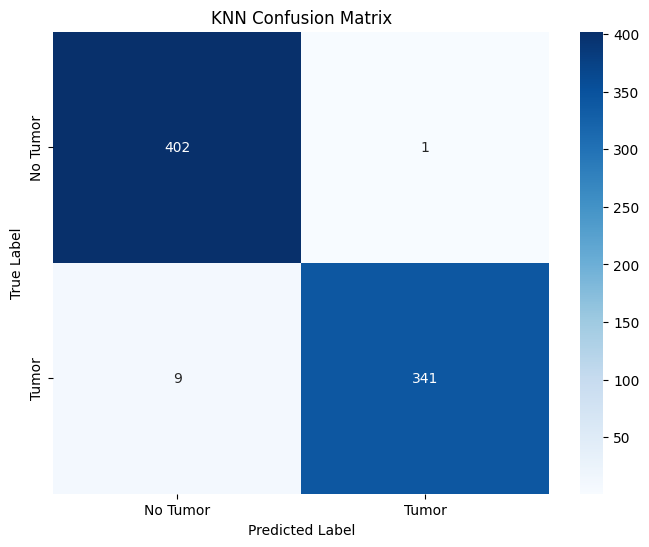

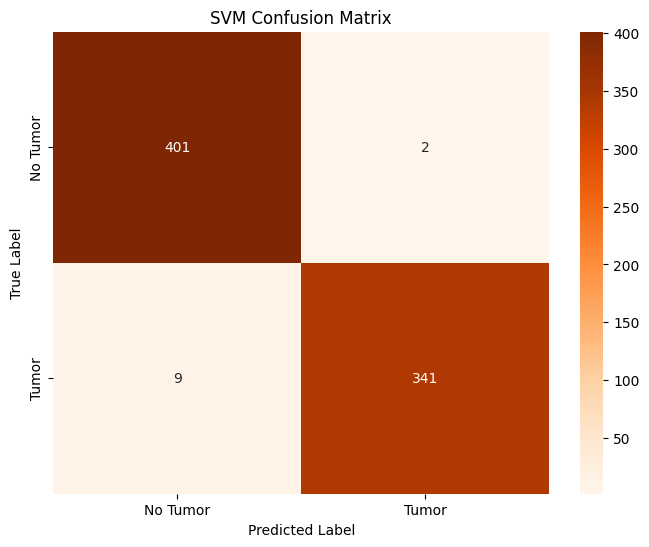

In [173]:
# Display the widgets
display(heading_widget,mean_text, variance_text, std_dev_text, entropy_text, skewness_text,
        kurtosis_text, contrast_text, energy_text, asm_text, homogeneity_text,
        dissimilarity_text, correlation_text, coarseness_text, predict_button,
        result_label,Tumor_label, auto_switch_button, dataset_label,
        accuracy_button,accuracy_label,
        knn_accuracy_button,knn_accuracy_label,
        svm_accuracy_button,svm_accuracy_label,
        classification_report_button,knn_classification_report_button,svm_classification_report_button,
        tree_confusion_matrix_button ,knn_confusion_matrix_button, svm_confusion_matrix_button,
        visualize_button)